<a href="https://colab.research.google.com/github/LhGhan/LhGhan/blob/main/SVM_VOICE_14jan_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df= pd.read_csv('voice.csv')

df.head(10)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,...,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,male
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,...,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,male
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,...,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,male
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,...,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,male


Target Feature = Label

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [ ]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [ ]:
df = pd.set_option('display.max_columns', None)
df

In [ ]:
df['label'].value_counts()


male      1584
female    1584
Name: label, dtype: int64

In [ ]:
df.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [ ]:
# include the first columns till the last columns
X = df.iloc[:,:-1]

X.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [ ]:
# Data Normalization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)

X = scaler.transform(X)

type(X)

X[:10]

array([[-4.04924806,  0.4273553 , -4.22490077, -2.57610164, -5.69360723,
        -0.21477826,  2.29330585,  1.76294635, -0.03908279,  0.4715753 ,
        -2.14121031, -4.04924806, -1.81203825, -1.0979981 ,  0.56595854,
        -1.5642046 , -0.70840431, -1.43142165, -1.41913712, -1.45477229],
       [-3.84105325,  0.6116695 , -3.99929342, -2.48688452, -5.58898726,
        -0.25848536,  4.54805598,  4.43300778, -0.06523603,  0.59443122,
        -2.14121031, -3.84105325, -1.07959443, -1.09153262, -0.29403034,
        -1.56191576, -0.70840431, -1.41810716, -1.4058184 , -1.01410294],
       [-3.46306647,  1.60384791, -4.09585052, -2.7069865 , -3.92869875,
         0.90932569,  6.51365636,  7.32620677, -1.08373029,  0.39826097,
        -2.14121031, -3.46306647, -1.36536788, -1.10039656,  0.41048032,
        -1.56386648, -0.70840431, -1.42920257, -1.41691733, -1.06534356],
       [-0.99215739,  0.89999793, -0.75945371, -0.90141834, -0.7112046 ,
         0.63269035, -0.44985837, -0.24009931,  

In [ ]:
# label the y as label
y = df.iloc[:,-1]



In [ ]:
# Y is encoded and transform to array (LabelEncoder is used to convert categorical labels in the target variable y into numerical format)
from sklearn.preprocessing import LabelEncoder

gender_encoder = LabelEncoder()

y= gender_encoder .fit_transform(y)

y

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split (X,y, test_size= 0.2, random_state = None)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(2534, 20) (634, 20) (2534,) (634,)


In [ ]:
df.shape

(3168, 21)

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics

svc = SVC(kernel = 'rbf')

svc.fit(X_train,y_train)

y_pred = svc.predict(X_test)

print('The accuracy is:', metrics.accuracy_score(y_test,y_pred)*100)

The accuracy is: 98.10725552050474


The Kernels of SVM are
*Rbf 'rbf'
*Linear 'linear'
*Polynormial 'poly'
*Sigmoid 'sigmoid'
*Precomputed 'precomputed'

In [ ]:
svc = SVC(kernel = 'linear')

svc.fit(X_train,y_train)

y_pred = svc.predict(X_test)

print('The accuracy is:', metrics.accuracy_score(y_test,y_pred)*100)

The accuracy is: 97.0031545741325


In [ ]:
svc = SVC(kernel = 'poly')

svc.fit(X_train,y_train)

y_pred = svc.predict(X_test)

print('The accuracy is:', metrics.accuracy_score(y_test,y_pred)*100)

The accuracy is: 95.58359621451105


In [ ]:
svc = SVC(kernel = 'sigmoid')

svc.fit(X_train,y_train)

y_pred = svc.predict(X_test)

print('The accuracy is:', metrics.accuracy_score(y_test,y_pred)*100)

The accuracy is: 81.70347003154575


In [ ]:
svc = SVC(kernel = 'precomputed')

svc.fit(X_train,y_train)

y_pred = svc.predict(X_test)

print('The accuracy is:', metrics.accuracy_score(y_test,y_pred)*100)

ValueError: Precomputed matrix must be a square matrix. Input is a 2534x20 matrix.

In [ ]:
from sklearn.model_selection import cross_val_score

svc = SVC(kernel = 'linear')

scores = cross_val_score(svc, X,y,cv=10, scoring='accuracy')

print(scores)
print('')
print('The mean accuracy of CV is', (scores.mean())*100)

[0.91167192 0.97160883 0.97160883 0.97791798 0.95899054 0.9873817
 0.99369085 0.97791798 0.95253165 0.99367089]

The mean accuracy of CV is 96.96991175178692


In [ ]:
svc = SVC(kernel = 'rbf')

scores = cross_val_score(svc, X,y,cv=10, scoring='accuracy')

print(scores)
print('')
print('The mean accuracy of CV is', (scores.mean())*100)

[0.93375394 0.95583596 0.96845426 0.96214511 0.96529968 0.99684543
 0.99053628 0.98422713 0.91455696 0.99367089]

The mean accuracy of CV is 96.65325639899376


In [ ]:
svc = SVC(kernel = 'sigmoid')

scores = cross_val_score(svc, X,y,cv=10, scoring='accuracy')

print(scores)
print('')
print('The mean accuracy of CV is', (scores.mean())*100)

[0.6466877  0.76340694 0.82018927 0.88958991 0.81072555 0.84858044
 0.74132492 0.8170347  0.71518987 0.80063291]

The mean accuracy of CV is 78.53362216986784


[0.9696991175178692, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.9693836601046201, 0.9693836601046201, 0.969068202691371, 0.9687527452781215, 0.9684372878648724]


Text(0, 0.5, 'Cross-Validated Accuracy')

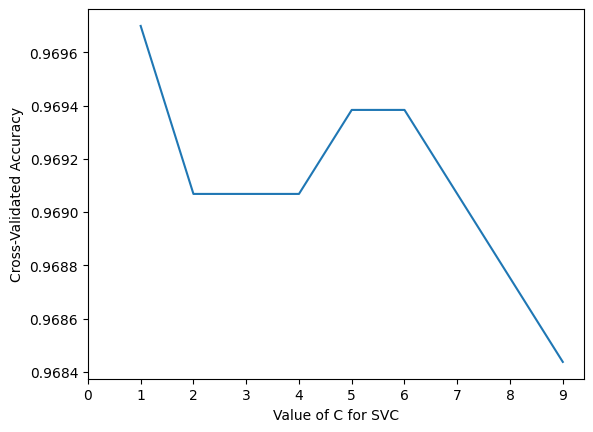

In [ ]:
# find the best value of C FOR
import numpy as np

C_range=list(range(1,10))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)


import matplotlib.pyplot as plt
%matplotlib inline


C_values=list(range(1,10))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0,10,1))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

In [ ]:
import numpy as np
C_range=list(range(0.1,5,0.1))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)


import matplotlib.pyplot as plt
%matplotlib inline


C_values=list(range(0.1,5,0.1))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0.1,5,0.2))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

TypeError: 'float' object cannot be interpreted as an integer

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       316
           1       0.97      0.97      0.97       318

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634

